# Common Tests (Parametric vs non-Parametric)
### Load main libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20}) # Increase fontsize

from scipy import stats

In [4]:
import pandas as pd


In [5]:
import numpy as np


In [8]:
!pip install matplotlib

In [6]:
import matplotlib.pyplot as plt


In [7]:
import seaborn as sns


In [ ]:
from scipy import stats

## Practical Example: Auto.csv
Read data from csv and format columns

df_auto = pd.read_csv("Auto.csv", na_values='?')

df_auto.replace({"origin": {1:"American", 2:"European", 3:"Japanese"}}, inplace=True)

In [9]:
df_auto = pd.read_csv("C:\\Users\\noman\\My Drive\\ABP\\ABP DSBA Batch 03\\Unit 01\\Session 06\\Auto.csv", na_values='?')

type(df_auto)

pandas.core.frame.DataFrame

In [10]:
#EDA
df_auto.head(10)

print(df_auto.describe(include='all'))
df_auto['origin'].unique()
df_auto['origin'].value_counts()

               mpg   cylinders  displacement  horsepower       weight  \
count   397.000000  397.000000    397.000000  392.000000   397.000000   
unique         NaN         NaN           NaN         NaN          NaN   
top            NaN         NaN           NaN         NaN          NaN   
freq           NaN         NaN           NaN         NaN          NaN   
mean     23.515869    5.458438    193.532746  104.469388  2970.261965   
std       7.825804    1.701577    104.379583   38.491160   847.904119   
min       9.000000    3.000000     68.000000   46.000000  1613.000000   
25%      17.500000    4.000000    104.000000   75.000000  2223.000000   
50%      23.000000    4.000000    146.000000   93.500000  2800.000000   
75%      29.000000    8.000000    262.000000  126.000000  3609.000000   
max      46.600000    8.000000    455.000000  230.000000  5140.000000   

        acceleration        year      origin        name  
count     397.000000  397.000000  397.000000         397  
uniqu

origin
1    248
3     79
2     70
Name: count, dtype: int64

In [11]:
df_auto[["origin",'weight','mpg']]


,origin,weight,mpg
0,1,3504,18.0
1,1,3693,15.0
2,1,3436,18.0
3,1,3433,16.0
4,1,3449,17.0
...,...,...,...
392,1,2790,27.0
393,2,2130,44.0
394,1,2295,32.0
395,1,2625,28.0


In [13]:
df_auto[0:15]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,American,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,American,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,American,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,American,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,American,amc ambassador dpl


In [12]:
#replaceDict = {"origin": {1:"American", 2:"European", 3:"Japanese"}}
#df_auto.replace(replaceDict, inplace=True)
#OR
df_auto["origin"] = df_auto["origin"].replace({1:"American",2:"European",3:"Japanese"})



In [14]:
df_auto['origin'].value_counts()
#df_auto.head(10)

#len(df_auto)
#print(df_auto.describe(include='all'))
#print(df_auto['origin'].unique())

origin
American    248
Japanese     79
European     70
Name: count, dtype: int64

### One sample t-Test

Perform an one sample t-Test for car weight by origin.
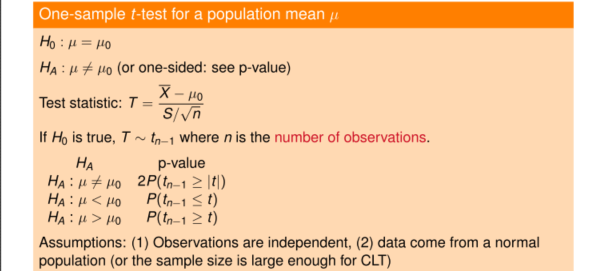

Example how to interpret p value for one sided test
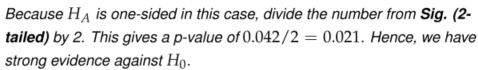

Example: lets check if Japanese cars' avg weight is 2000 KG

stat, p = stats.ttest_1samp(a=df_auto[df_auto['origin']=='Japanese']['weight'], popmean=2000)

print(stat , p)

NB: the mean is 2000

In [20]:
df_auto[df_auto['origin'] == 'Japanese'] ['weight']

14     2372
18     2130
29     2130
31     2228
53     1773
       ... 
381    2245
382    1965
383    1965
384    1995
389    2665
Name: weight, Length: 79, dtype: int64

In [21]:
wjc = df_auto[df_auto['origin'] == 'Japanese'] ['weight']
wec = df_auto[df_auto['origin'] == 'European']['weight']
wac = df_auto[df_auto['origin'] == 'American']['weight']


In [23]:
wec

19     1835
20     2672
21     2430
22     2375
23     2234
       ... 
354    2320
359    3230
360    3160
374    1980
393    2130
Name: weight, Length: 70, dtype: int64

In [26]:
np.mean(wjc)
#H0: mean wght of JC is less than or equal to 2000


2221.227848101266

In [27]:
np.mean(wec)

2423.3

In [25]:
stats.ttest_1samp(wjc, 2000)

TtestResult(statistic=6.135204397610387, pvalue=3.2959329515512245e-08, df=78)

In [28]:
stats.ttest_1samp(wjc, popmean = 2000)
#stats.ttest_1samp(wjc, 2000)

#np.mean(df_auto[df_auto['origin'] == 'Japanese']['weight'])

TtestResult(statistic=0.5887015949415023, pvalue=0.5577624700507433, df=78)

In [ ]:
# that means there is almost 0% probability that the difference is due to chance.
# t value 3.36 means the avg weight of Jap car is 3.36 SE away from 2200KG.
# So now on: whenever we see p value is less than 0.05, we will say, we can reject NULL HYPOTHESIS.


### Two samples t tests

t-tests are often used to compare the mean of a variable between 2 samples.

Assumption is: continuous variable with normal distribution and homogeneous variance across groups. If the later assumption is dropped, then the test is referred to as Welch t-test.


<b> Example and Interpretation of result:

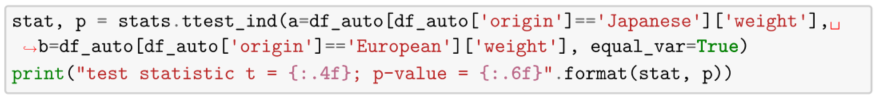
    
- The t‐value is a test statistic that measures the difference between two 
means in units of standard error.
    
- The p‐value describes how likely it is that the sample means differ by chance. It is based on comparing the t‐value with critical t‐values.

In [ ]:
#plt.hist(wjc, alpha=0.5, label='Japanese')
#plt.hist(wec, alpha=0.5, label='European')

<Axes: xlabel='weight', ylabel='Count'>

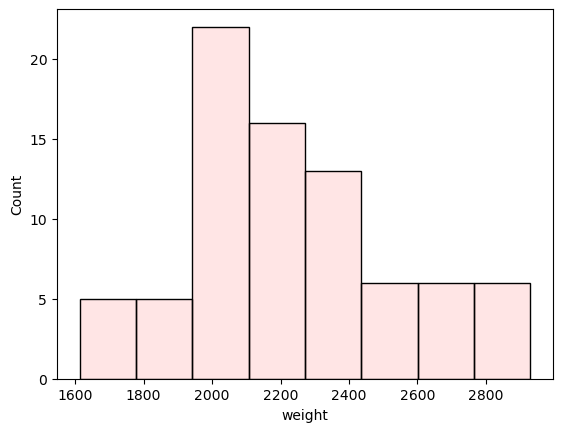

In [33]:
sns.histplot(data=wjc, color = 'red', alpha = 0.1)

#sns.histplot(data=wec, color = 'green', alpha = 0.1)


<b>Testing normality assumption

In [34]:
stats.shapiro(wjc) # Unpacking the tuple into the second variable


ShapiroResult(statistic=0.9625360369682312, pvalue=0.020406033843755722)

In [35]:


stats.shapiro(wec) # Unpacking the tuple into the second variable



ShapiroResult(statistic=0.9106442928314209, pvalue=0.0001047861369443126)

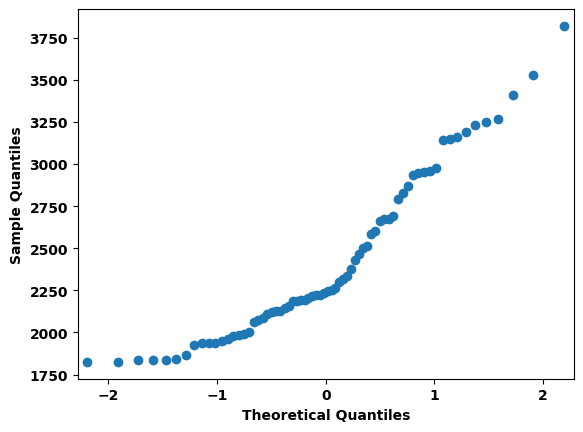

In [45]:
import statsmodels.api as sm
sm.qqplot(wec)

plt.show() # seaborn does not have any direct way to plot QQ graph


In [200]:
np.mean(wjc)

2221.227848101266

In [201]:
np.mean(wec)

2423.3

In [34]:
print(np.var(wjc))
print(np.var(wec))

101418.25188271108
236711.72428571447


In [ ]:
print(len(df_auto[df_auto['origin'] == 'Japanese']))
print(len(df_auto[df_auto['origin'] == 'European']))

In [29]:
#stats.ttest_ind(a= wjc, b = wec, equal_var = True)
stats.ttest_ind(wjc, wec, equal_var = True)

#Here our assumpltion is var of two samples are same
# if not: put equal_var = False, and thts called Welch test
#print(np.var(wjc))
#print(np.var(wec))
# Looks like the var of these two sample are not same

Ttest_indResult(statistic=-3.0104205626164715, pvalue=0.0030714398812405974)

In [ ]:
As P value is less than 0.05, we can reject the NULL Hypothesis. 
In other words we can conclude that,  
the avg weight of Jap car and European cars are not same

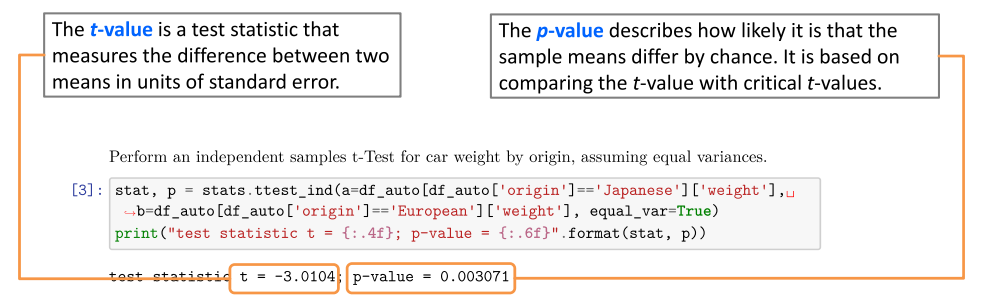

### Testing for homogeneity of variance

In the example, we simply assumed that the variance in the two subsamples (i.e., weight of European and Japanese cars) are homogeneous. We need to test for variance homogeneity more formally.

#### Visual - Box plot
Create a box plot for weight of cars by origin.
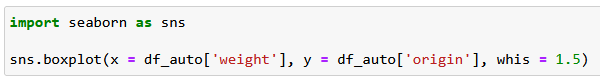

<AxesSubplot:xlabel='origin', ylabel='weight'>

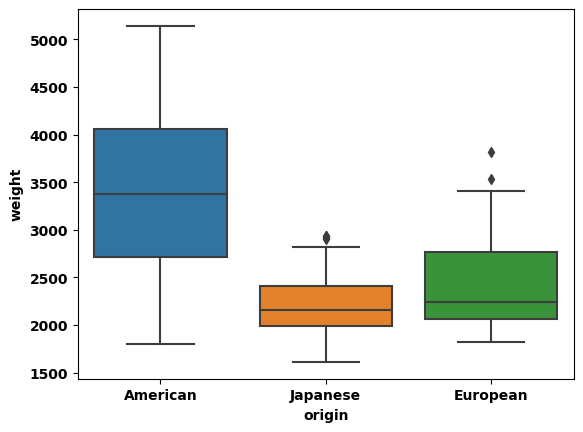

In [36]:
sns.boxplot(y = df_auto['weight'], x = df_auto['origin'], whis = 1.5)


### Variance Homogeneity
<b> Calculating the variances

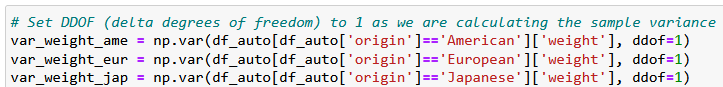

In [28]:
print(np.var(wjc))
print(np.var(wec))
print(np.var(wac))


101418.25188271108
236711.72428571447
631262.4052419355


<b> Statistical tests
    
Two common tests for variance homogeneity:

‐ <b>Bartlett’s Test</b> – Works well for data that is normally distributed, but might lead to false positives otherwise.

‐ <b>Levene’s Test</b> – A test that is more robust to deviations from normal distribution.

### Bartlett's Test
#### Performing Bartlett's Test for Variance Homogeneity for weight by origin.
$$H_0: \sigma_{weight,American}^2=\sigma_{weight,European}^2=\sigma_{weight,Japanese}^2$$
$$H_1: \neg H_O$$

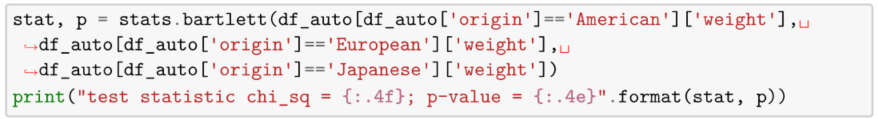

In [29]:
stats.bartlett(wjc, wec,wac)

BartlettResult(statistic=81.99527384538678, pvalue=1.5665797678808402e-18)

#### Performing Bartlett's Test for Variance Homogeneity for weight by origin (only Europe and Japan).
$$H_0: \sigma_{weight,European}^2=\sigma_{weight,Japanese}^2$$
$$H_1: \neg H_O$$

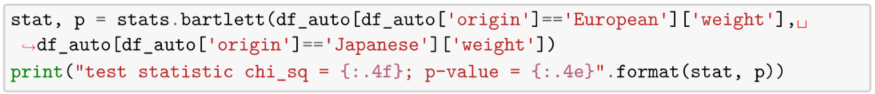

In [31]:
stats.bartlett(wjc, wec)

BartlettResult(statistic=12.952807544836467, pvalue=0.0003194420726999129)

### Levene's Test
#### Performing Levene's Test for Variance Homogeneity for weight by origin.
$$H_0: \sigma_{weight,American}^2=\sigma_{weight,European}^2=\sigma_{weight,Japanese}^2$$
$$H_1: \neg H_O$$

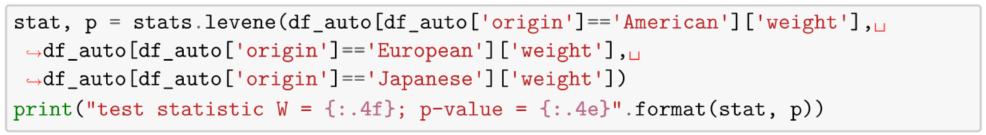

In [30]:
stats.levene(wjc, wec, wac)

LeveneResult(statistic=43.82577353387339, pvalue=6.521727704807168e-18)

#### Performing Levene's Test for Variance Homogeneity for weight by origin (only Europe and Japan).
$$H_0: \sigma_{weight,European}^2=\sigma_{weight,Japanese}^2$$
$$H_1: \neg H_O$$

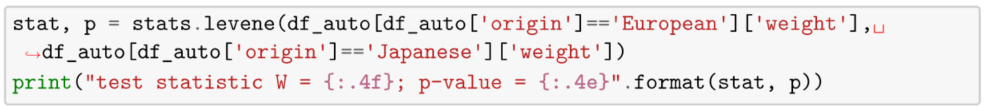

In [32]:
stats.levene(wjc, wec)

LeveneResult(statistic=7.747779904533292, pvalue=0.006084934599995154)

<b>Interpretation 
    
Both tests indicate that the variances are not homogeneous. Hence we should run a Welch test when comparing the 
means, i.e., a t‐test assuming non‐homogeneous variances.

### An Example of a t‐Test with Scipy (Non‐Homogeneous Variances)

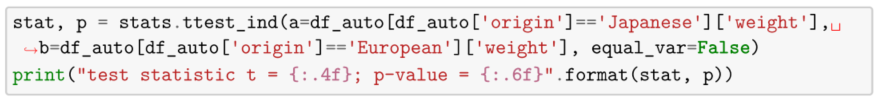

### Welch Test

Welch's t-test is suitable for comparing two groups, requires approximate normality but not equal variances, and is generally used with continuous data. It offers a more robust alternative to the standard t-test when variances are unequal.

   Purpose: Tests for differences in the mean between two independent groups. It's a modified version of the independent t-test.

Assumptions: Does not assume equal variances across the two groups (unlike the standard t-test), but still assumes normality within each group (or at least approximate normality for large sample sizes).

Method: Adjusts the degrees of freedom and standard error in the t-test formula to account for unequal variances, using the Welch-Satterthwaite equation.

Use Case: When you have two groups, and the variances are not equal but the distribution is approximately normal.

In [35]:
stats.ttest_ind(a = wjc, b = wec, equal_var = False)


Ttest_indResult(statistic=-2.9379026165578535, pvalue=0.003984572805824074)

In [ ]:
# Result interpretation
# “The difference in weight between Japanese (M = 2221.23, SD = 320.50) and 
# European (M = 2423.30, SD = 490.04) cars is significant (t = –2.9379, p = .004).

<b> Mann-Whitney U Test

Purpose: Used to compare the medians (or mean ranks) of two independent groups.

Method: Ranks all the observations from both groups together, then compares the sum of ranks between the two groups.

Assumptions: Assumes that samples are independent and that observations are at least ordinal. Does not assume normality or equal variances.
    
Use Case: When you have exactly two groups, and the data are not normally distributed or variances are not equal.

In [47]:
from scipy.stats import mannwhitneyu

mannwhitneyu(wjc, wec)



MannwhitneyuResult(statistic=2209.5, pvalue=0.0347715799741095)

### One-way Analysis of Variance (ANOVA) Test

A one‐way ANOVA (analysis of variance) is a parametric test which determines whether a categorical variable (with K≥ 2 levels) has a significant 
influence on the variance of a variable.

An ANOVA avoids the problem of multiple 
comparisons, which occurs when we repeatedly use pairwise tests (e.g., t‐tests) to compare the means of different groups.

Perform a one-way ANOVA Test for car weight by origin.
Hypotheses:
$$H_0: \mu_{weight,American}=\mu_{weight,European}=\mu_{weight,Japanese}$$
$$H_1: \neg H_O$$

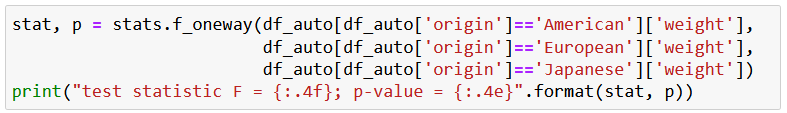

In [30]:
np.mean(wjc)

2221.227848101266

In [31]:
np.mean(wec)

2423.3

In [32]:
np.mean(wac)

3363.25

In [33]:
stats.f_oneway(wjc, wec, wac)

F_onewayResult(statistic=112.63687321690462, pvalue=2.0505479668168276e-39)

In [ ]:
# the p Values is very small, close 10 0, that means we can reject NULL Hypo (ie. ,all mean weights 
# are same)
# our conclusion is: there is diff of mean weight among origin
# Origin has influence on car weight
# Origin matters

""" 
The F‐statistic equals to the variance between 
groups divided by the variance within groups.
- If there is no influence of the group, then the F‐
statistic has a value of 1 on average.
- However, if there is a systematic influence of the 
group, then the F‐statistic has a value of greater 
than 1.
- Result: “There is a significant relationship between 
the weight of a car and its origin (F = 112.6, 
p<.001).”
"""

### PostHoc analysis

The ANOVA only determines whether there is any significant difference (i.e., at least one) in the K population means. However, it does not provide us with information which of the groups differ from each other significantly. In order to compare the means, we need to run a PostHoc analysis.

`scipy` does not include PostHoc tests. Perform PostHoc analysis using `statsmodels.stats.multicomp` from the library `statsmodels`.
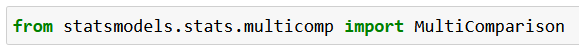

In [50]:
from statsmodels.stats.multicomp import MultiComparison

#### Pairwise t-Test

Perform pairwise t-Tests. 
$$H_0: \mu_{weight,group1}=\mu_{weight,group2}$$
$$H_1: \neg H_O$$

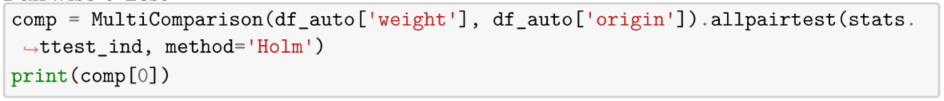

In [52]:
comp = MultiComparison(df_auto['weight'], df_auto['origin'])\
.allpairtest(stats.ttest_ind, method='Holm') # Holm/Bonferroni

print(comp[0])


Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
 group1   group2    stat   pval  pval_corr reject
-------------------------------------------------
American European  9.3828    0.0       0.0   True
American Japanese 12.4226    0.0       0.0   True
European Japanese  3.0104 0.0031    0.0031   True
-------------------------------------------------


#### Tukey HSD Test
Perform Tukey HSD Test for pairwise comparisons. 
$$H_0: \mu_{weight,group1}=\mu_{weight,group2}$$
$$H_1: \neg H_O$$

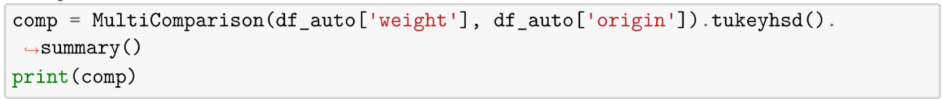

In [51]:
MultiComparison(df_auto['weight'], df_auto['origin']).tukeyhsd().summary()


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------
American European    -939.95    0.0  -1155.844  -724.056   True
American Japanese -1142.0222    0.0 -1348.1024 -935.9419   True
European Japanese  -202.0722 0.1658    -463.91   59.7657  False
---------------------------------------------------------------


In this example, the different PostHoc analysis procedures come to different 
results with respect to the weight difference between Japanese and European cars. This is most likely due to the non‐homogeneous variances.

Tukey HSD: assumes equal (homogeneous) variace

For more than two groups

<b> Allpair test if non-homogenous variance

In [229]:
from statsmodels.stats.multitest import multipletests
_, p_val1 = stats.ttest_ind(a = wjc, b = wec, equal_var = False)
_, p_val2 = stats.ttest_ind(a = wjc, b = wac, equal_var = False)
_, p_val3 = stats.ttest_ind(a = wac, b = wec, equal_var = False)

p_values = [p_val1, p_val2, p_val3]

# Apply Holm's method to correct for multiple comparisons
print(multipletests(p_values, method='holm')[1])

[3.98457281e-03 4.60526180e-51 6.00259018e-25]


### If normality assumption is also not met

<b>Kruskal-Wallis Test

Purpose: Tests for differences in the median (or mean rank) of three or more independent groups. It's a non-parametric equivalent to one-way ANOVA.
   
Assumptions: Does not assume normality or equal variances across groups. It only assumes that samples are independent and identically structured.
    
Method: Ranks all the observations together, then compares the mean ranks between groups.
    
Use Case: When you have three or more groups, and the data are not normally distributed or variances are not equal.

In [48]:
import scipy.stats as stats

# Perform Kruskal-Wallis test on the groups of weight values
stats.kruskal(wjc, wec, wac)

KruskalResult(statistic=157.74104837506465, pvalue=5.58427195746909e-35)

<b> Post hoc analysis of Kruskal Wallis Test

<b> Dunn's Test

In [231]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_auto, val_col='weight', group_col='origin', p_adjust='holm')
posthoc

,American,European,Japanese
American,1.000000e+00,7.573169e-17,1.025690e-27
European,7.573169e-17,1.000000e+00,8.480509e-02
Japanese,1.025690e-27,8.480509e-02,1.000000e+00


<b> Pairwise Mann-Whitney U Tests
    
Pairwise comparisons using the Mann-Whitney U test and then adjust the p-values using a method like the Bonferroni correction.

In [53]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import mannwhitneyu

mc = MultiComparison(df_auto['weight'], df_auto['origin'])
results = mc.allpairtest(mannwhitneyu, method='bonf')
print(results[0])


Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
 group1   group2    stat   pval  pval_corr reject
-------------------------------------------------
American European 14501.0    0.0       0.0   True
American Japanese 17747.5    0.0       0.0   True
European Japanese  3320.5 0.0348    0.1043  False
-------------------------------------------------


## Relationship between numerical variables

### Correlation

A correlation is a measure for the strength and direction of a linear 
relationship between two variables. The correlation coefficient r is a numerical value that ranges between +1.0 and ‐1.0.


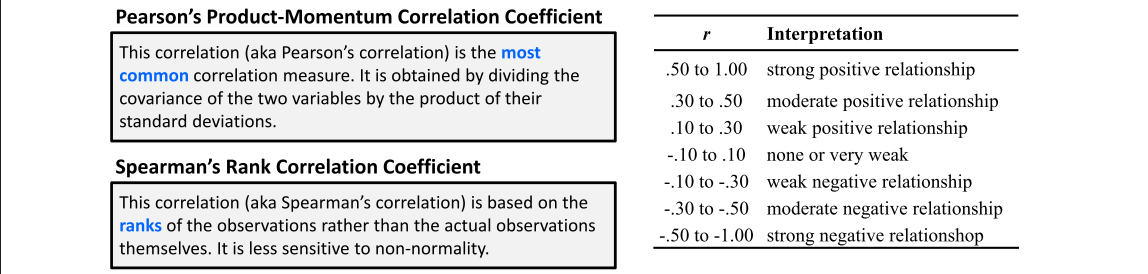

<b>Correlation table
    
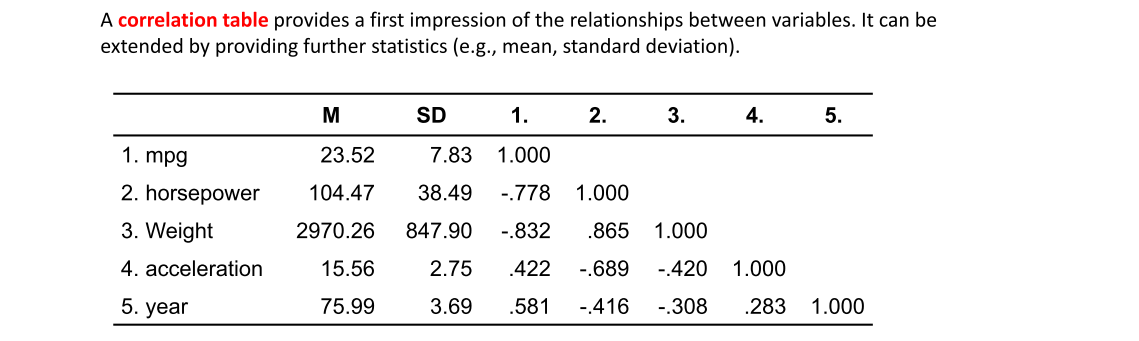

#### Graphical correlation matrices
Calculate the correlation matrix and visualize it using `matplotlib`.

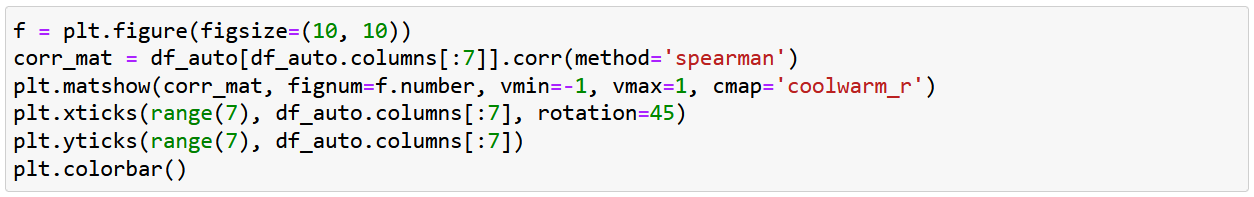



In [ ]:
f = plt.figure(figsize= (6,6))
df_auto[df_auto.columns[:7]].head(10)
corr_result = df_auto[df_auto.columns[:7]].corr(method ='spearman')
print(corr_result)
plt.matshow(corr_result,fignum = f.number, vmin =-1, vmax = 1, cmap = 'coolwarm_r')
plt.xticks(range(7),df_auto.columns[:7],rotation = 90)
plt.yticks(range(7),df_auto.columns[:7])
plt.colorbar()

In [ ]:
corr_result


#### Use seaborn to visualize correlations
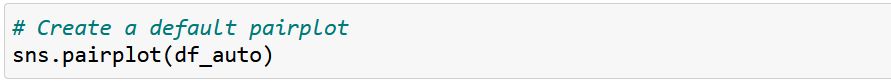

In [ ]:
df_auto.head()

In [ ]:
sns.pairplot(df_auto)

Let's select some specific variables of interest (accelation, horsepower, mpg, weight, year)

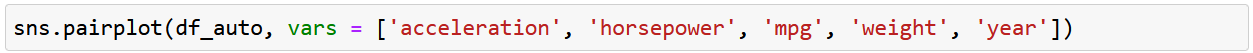

In [ ]:
#sns.pairplot(df_auto, vars = ['acceleration', 'horsepower', 'mpg', 'weight', 'year'])
sns.pairplot(df_auto, vars = ['horsepower', 'weight'])

Narrow in on individual observations (e.g. the one falling outside the pattern in weight over horsepower)

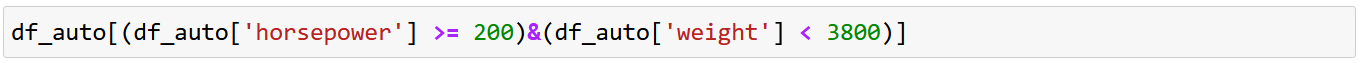

Let's have a look at 4-cylinder cars of different origins
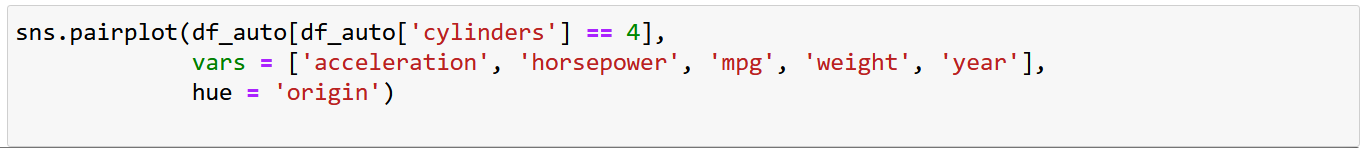

In [ ]:
sns.pairplot(df_auto, vars = ['acceleration', 'horsepower', 'mpg', 'weight', 'year'], hue = 'origin')

Let's have a look at theV4s, V6s, V8s for American cars
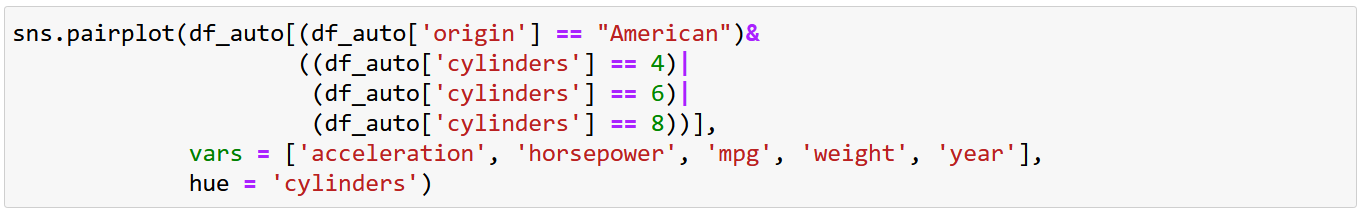

Some notes:

- Anova alternatives: https://www.quality-control-plan.com/StatGuide/oneway_anova_alts.htm

- Here is how to do it: https://www.geeksforgeeks.org/how-to-perform-welchs-anova-in-python/

- pairwise t-test and Tukey are not under Anova. They can be used independently.

- whether Tukey HSD Test is used in cases where homogeneity of variance is not satisfied? - Yes

- whether ANOVA needs to satisfy homogeneity of variance? - Yes, otherwise Welch's Anova

- If the data is not normally distributed, does it also mean that ANOVA and Tukey HSD Test are not applicable and only nonparametric methods can be used? - Yes

- this should also be a good read: https://real-statistics.com/one-way-analysis-of-variance-anova/kruskal-wallis-test/



### Relationship between categorical variables (eg., 'origin' vs 'cylinders')

<b>Stacked Bar Plot:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='origin', y='cylinders', hue='cylinders', data=df_auto, errorbar=None)
plt.show()


<b>Mosaic plot

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df_auto, ['origin', 'cylinders'])
plt.show()


<Grouped bar plot>

<b> Grouped bar plot

In [ ]:
sns.catplot(x='origin', y='cylinders', hue='cylinders', data=df_auto, kind='bar')
plt.show()


<b> Clustered Bar Plot with plotly

In [ ]:
import plotly.express as px

fig = px.bar(df_auto, x='origin', y='cylinders', color='cylinders', barmode='group')
fig.show()


<b> Chi square test

In [ ]:

# Create a contingency table
contingency_table = pd.crosstab(df_auto['origin'], df_auto['cylinders'])
print(contingency_table)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
p